In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

In [146]:
df=pd.read_excel('Dataset_GMSalary_clean.xlsx')

In [156]:
X=df.iloc[:,:].values
scaler=StandardScaler()
data = scaler.fit_transform(X)

In [157]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)

In [158]:
pca=PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [159]:
data=pca.transform(data)

In [160]:
frame = pd.DataFrame(data)
frame['cluster'] = labels


In [161]:
frame.columns = ['PC1', 'PC2', 'cluster']

In [162]:
frame

,PC1,PC2,cluster
0,-0.551656,1.214342,0
1,3.846498,-1.259464,1
2,2.258319,1.563634,1
3,0.414819,-1.586299,0
4,-0.733535,-0.915081,0
...,...,...,...
10287,3.501832,2.412915,1
10288,0.726228,0.977897,1
10289,-0.371189,0.431910,0
10290,-2.331741,2.346718,0


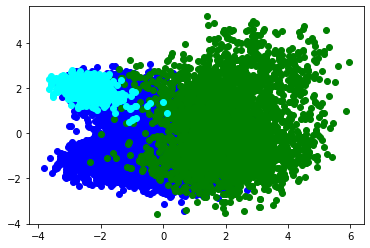

In [163]:
color=['blue','green','cyan', 'black','red','yellow']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PC1"],data["PC2"],c=color[k])
plt.show()